# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

<img src="https://github.com/bunny-as7/NLP-Sentiment-Analysis/blob/master/download%20(1).png?raw=1"  width="" />

data source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd   # dataframe manipulation
import numpy as np  #numerical analysis
import seaborn as sns # data visualizations
import matplotlib.pyplot as plt # data visualizations
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load the data
tweets_df = pd.read_csv('twitter.csv')

In [ ]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

Obj #1: 
- Drop the 'id' column from the DataFrame as they are not needed
- Ensure that the column has been succesfully dropped. 

In [ ]:
tweets_df = tweets_df.drop(['id'], axis=1)

In [ ]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# TASK #3: EXPLORE DATASET

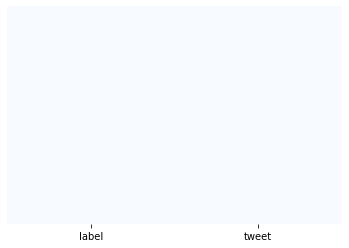

In [ ]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")  # to check is there are null elements - if there are null elements, then
 # there will bw black spaces

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7fbd46080>]],
      dtype=object)

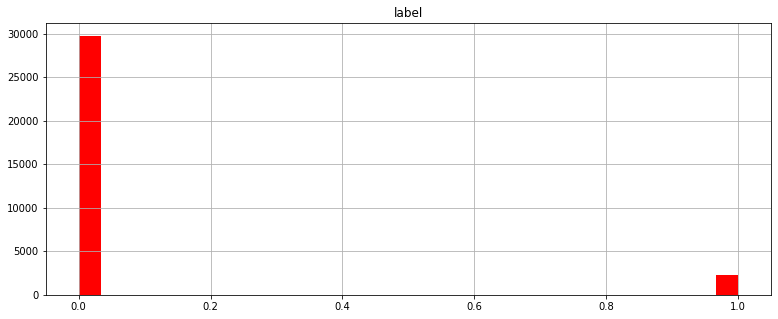

In [ ]:
 tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')  # here we can see that we have a large no of positive reviews and less no of negative reviews

Obj #2: 
- Plot similar figure using seaborn countplot

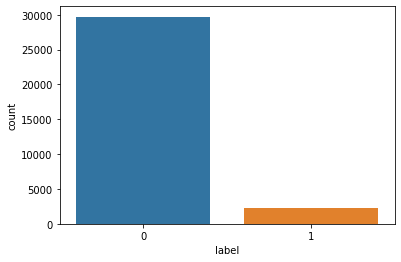

In [ ]:
sns.countplot(tweets_df['label'], label='count')

In [ ]:
# Let's get the length of the messages, creating a new column length and storing the results into it
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [ ]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


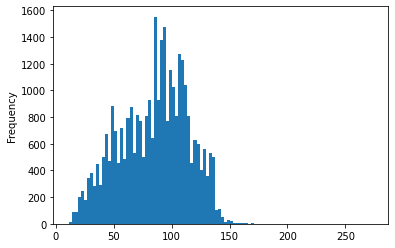

In [ ]:
# visualizing the distribution of length of the tweets
tweets_df['length'].plot(bins=100, kind='hist') 

In [ ]:
tweets_df.describe()   # this dataframe will contain a additional column 'length'

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [ ]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

Obj #3
- View the message with the average length

In [ ]:
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]   # 84 because the avg length (mean) is 84

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [ ]:
# dividing the tweets into 2 dataframe: positive and negative

In [ ]:
positive = tweets_df[tweets_df['label']==0]

In [ ]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [ ]:
negative = tweets_df[tweets_df['label']==1]

In [ ]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# TASK #4: PLOT THE WORDCLOUD

In [ ]:
# grab the tweets column and cobine them into 1 massive string
sentences = tweets_df['tweet'].tolist()

In [ ]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [ ]:
len(sentences)

31962

In [ ]:
sentences_as_one_string = ' '.join(sentences)

In [ ]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))
# A word cloud is a popular visualization of words typically associated with Internet keywords and text data. 
# They are most commonly used to highlight popular or trending terms based on frequency of use and prominence.

Obj #4: 
- Plot the wordcloud of the "negative" dataframe. 
- What do you notice? Does the data make sense?

In [ ]:
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

**Data cleaning in task 5, 6 and 7** 

# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

In [ ]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [ ]:
# we will use list comprehension to remove punctuations from the text
Test_punc_removed = [ char for char in Test if char not in string.punctuation ]

In [ ]:
# Join the characters again to form the string.
Test_punc_removed

In [ ]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

Obj #5: 
- Remove punctuations using a different method


In [ ]:
Test_punc_removed = []

for char in Test:
  if char not in string.punctuation:
    Test_punc_removed.append(char)

Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [ ]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

In [ ]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')
# a list of stopwords (general words)
# In NLP, we usually don't care about these stopwords. We care about unique words from which we can gain some knowledge

In [ ]:
Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [ ]:
Test_punc_removed_join_clean

Obj #6: 
- For the following text, create a pipeline to remove punctuations followed by removing stopwords

In [ ]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [ ]:
challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 

In [ ]:
challenge

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

<img src="https://github.com/bunny-as7/NLP-Sentiment-Analysis/blob/master/download.png?raw=1"   />

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
# In X, we have the tokenized version of sample_data

In [ ]:
print(vectorizer.get_feature_names())
# every single unique word that we have in the sample_data

In [ ]:
print(X.toarray())

Obj #7:
- Without doing any code, perform count vectorization for the following list:
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- Confirm your answer with code

In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

# count vectorizer is case in-sensitive

# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [ ]:
print(tweets_df_clean[5]) # show the cleaned up version

In [ ]:
print(tweets_df['tweet'][5]) # show the original version

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [ ]:
print(vectorizer.get_feature_names())


In [ ]:
print(tweets_countvectorizer.toarray())  

In [ ]:
tweets_countvectorizer.shape

In [ ]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [ ]:
X = tweets


In [ ]:
X

In [ ]:
y = tweets_df['label']

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

<img src="https://github.com/bunny-as7/NLP-Sentiment-Analysis/blob/master/download%20(2).png?raw=1"   />

<img src="https://github.com/bunny-as7/NLP-Sentiment-Analysis/blob/master/download%20(3).png?raw=1"   />

<img src="https://github.com/bunny-as7/NLP-Sentiment-Analysis/blob/master/download%20(4).png?raw=1"   />

<img src="https://github.com/bunny-as7/NLP-Sentiment-Analysis/blob/master/download%20(5).png?raw=1"   />

<img src="https://github.com/bunny-as7/NLP-Sentiment-Analysis/blob/master/download%20(6).png?raw=1"   />

<img src="https://github.com/bunny-as7/NLP-Sentiment-Analysis/blob/master/download%20(9).png?raw=1"   />

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

<img src="https://github.com/bunny-as7/NLP-Sentiment-Analysis/blob/master/download%20(8).png?raw=1"   />

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))